# 0.0 - Imports


In [13]:
# Bibliotecas

import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib      import pyplot as plt
from IPython.display import HTML

## 0.1 - Helper Functions

In [14]:
# Configurações de Layout
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (24,9)
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container {width:93% ! important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## 0.2 - Carregamento dos Dados

In [15]:
# Carregamento dos Dados
df_raw = pd.read_csv('vitrine_macys.csv')

# Exibição
df_raw.head()

,product_id,product_name,price,color,fit,size,cotton,polyester,spandex,elastane,lyocell,viscose,scrapy_datetime
0,2834394,men's 502™ taper jeans,55.65,true_chino,regular_fit,28x30,yes,no,no,yes,yes,no,2022-08-20 09:38:17
1,2834394,men's 502™ taper jeans,55.65,true_chino,regular_fit,28x32,yes,no,no,yes,yes,no,2022-08-20 09:38:17
2,2834394,men's 502™ taper jeans,55.65,true_chino,regular_fit,29x30,yes,no,no,yes,yes,no,2022-08-20 09:38:17
3,2834394,men's 502™ taper jeans,55.65,true_chino,regular_fit,29x32,yes,no,no,yes,yes,no,2022-08-20 09:38:17
4,2834394,men's 502™ taper jeans,55.65,true_chino,regular_fit,30x30,yes,no,no,yes,yes,no,2022-08-20 09:38:17


# 1.0 - Descrição dos Dados

In [3]:
df1 = df_raw.copy()

## 1.1 - Atributos

**product_id** - Identificador do produto na Macys.

**product_name** - Nome do produto.

**price** - Preço do produto.

**color** - Cor do produto.

**fit** - Modelo do produto.

**size** - Tamanho da Calça.

**cotton** - Yes: Possui algodão na composição da calça; No: Não Possui algodão na composição da calça.

**polyester** - Yes: Possui poliester na composição da calça; No: Não Possui poliester na composição da calça.

**spandex** - Yes: Possui spandex na composição da calça; No: Não Possui spandex na composição da calça.

**elastane** - Yes: Possui elastano na composição da calça; No: Não Possui elastano na composição da calça.

**lyocell** - Yes: Possui lyocell na composição da calça; No: Não Possui lyocell na composição da calça.

**viscose** - Yes: Possui viscose na composição da calça; No: Não Possui viscose na composição da calça.

## 1.2 - Dimensão dos Dados

In [16]:
print('Quantidade de Linhas: {}'.format(df1.shape[0]))
print('Quantidade de Colunas: {}'.format(df1.shape[1]))

Quantidade de Linhas: 3450
Quantidade de Colunas: 13


## 1.3 - Estatística Descritica

In [17]:
# Selecionando somente os atributos numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64']).copy()

num_attributes = num_attributes[['price']].copy()

# ------------ Tendências Centrais -----------------------------------

# Média
mean = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
median = pd.DataFrame(num_attributes.apply(np.median)).T


# ------------ Tendências de Dispersão -------------------------------

# Máximo
maximo = pd.DataFrame(num_attributes.apply(np.max)).T

# Mínimo
minimo = pd.DataFrame(num_attributes.apply(np.min)).T

# Intervalo(Range)
intervalo = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# Desvio Padrão
desvio = pd.DataFrame(num_attributes.apply(np.std)).T

# Skewness
skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

# Kurtosis
kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


# ---------------------- Construção da Tabela de Estatística Descritiva -------------------------------

# Concatenação das Tabela
tabela_descritiva = pd.concat([minimo, maximo, intervalo, mean, median, desvio, skew, kurtosis]).T.reset_index()
tabela_descritiva.columns = ['atributos', 'minimo', 'maximo', 'intervalo', 'media', 
                             'mediana', 'desvio_padrao', 'skewness', 'kurtosis']

# Exibição da tabela descritiva
tabela_descritiva

,atributos,minimo,maximo,intervalo,media,mediana,desvio_padrao,skewness,kurtosis
0,price,20.0,150.0,130.0,58.029545,50.0,22.053218,1.097929,1.408993


# 2.0 - Análise Explotatória dos Dados 

In [8]:
df2 = df1.copy()

## 2.1 - Preço Médio dos Modelo das Calças

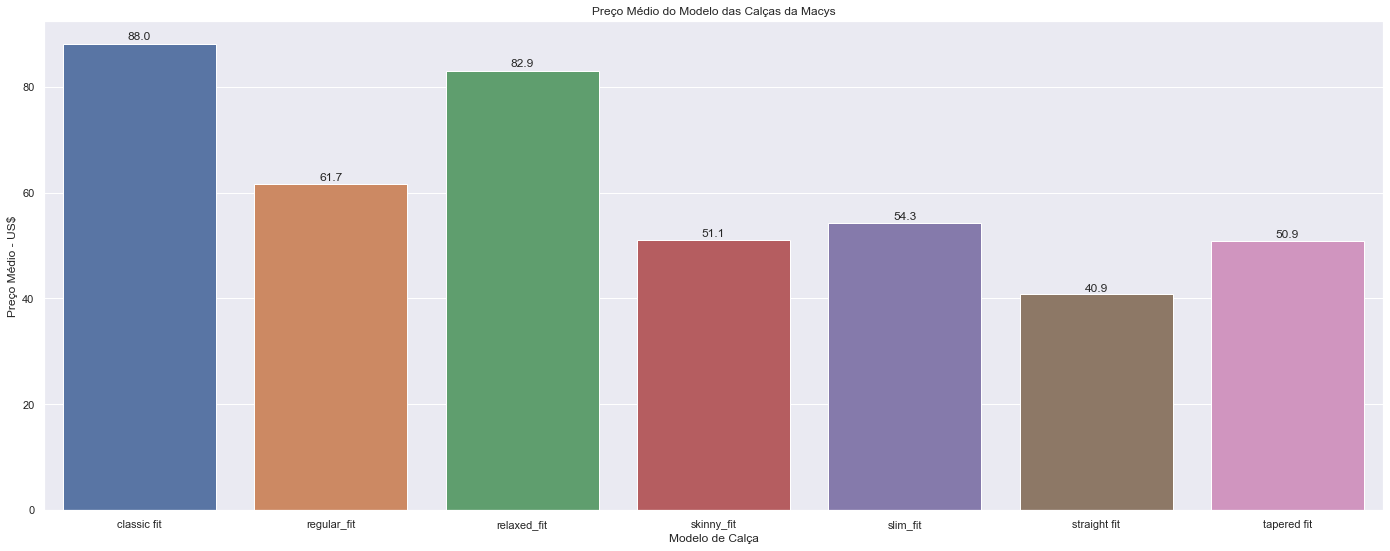

In [38]:
# Agrupar os preços e obter o preço médio.
df_preco_medio = (df2[['fit', 'price']].groupby('fit')
                                               .mean()
                                               .reset_index()
                                               .rename(columns = {'fit':'Modelo de Calça', 'price':'Preço Médio'}))

# Ajuste da coluna de preço
df_preco_medio['Preço Médio'] = np.round(df_preco_medio['Preço Médio'], 2)

# Plotagem do Gráfico
grafico_preco_mediano_hm = sns.barplot(x=df_preco_medio['Modelo de Calça'], y=df_preco_medio['Preço Médio'], data=df_preco_medio);

# Título do Gráfico
plt.title('Preço Médio do Modelo das Calças da Macys');
plt.ylabel('Preço Médio - US$')
show_values(grafico_preco_mediano_hm)

## 2.2 - Preço Máximo do Modelo das Calças

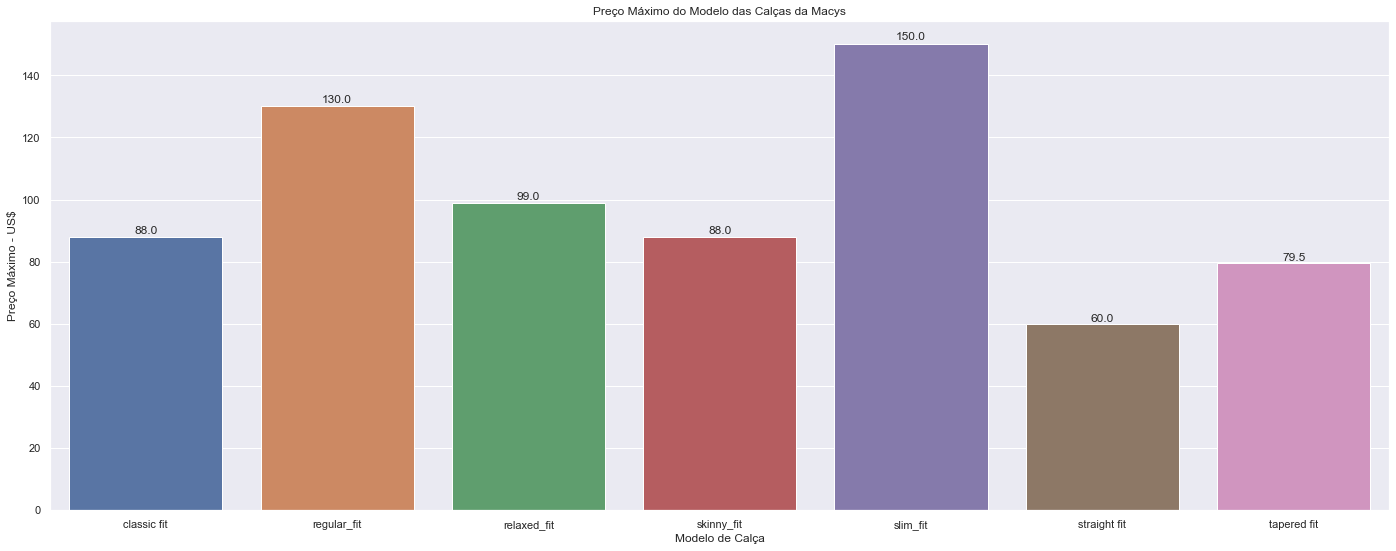

In [37]:
# Agrupar os preços e obter o preço máximo.
df_preco_maximo = (df2[['fit', 'price']].groupby('fit')
                                               .max()
                                               .reset_index()
                                               .rename(columns = {'fit':'Modelo de Calça', 'price':'Preço Máximo'}))

# Ajuste da coluna de preço
df_preco_maximo['Preço Máximo'] = np.round(df_preco_maximo['Preço Máximo'], 2)

# Plotagem do Gráfico
grafico_preco_maximo_hm = sns.barplot(x=df_preco_maximo['Modelo de Calça'], y=df_preco_maximo['Preço Máximo'], data=df_preco_maximo);

# Título do Gráfico
plt.title('Preço Máximo do Modelo das Calças da Macys');
plt.ylabel('Preço Máximo - US$')
show_values(grafico_preco_maximo_hm)

## 2.3 - Preço Mínimo dos Modelos das Calças

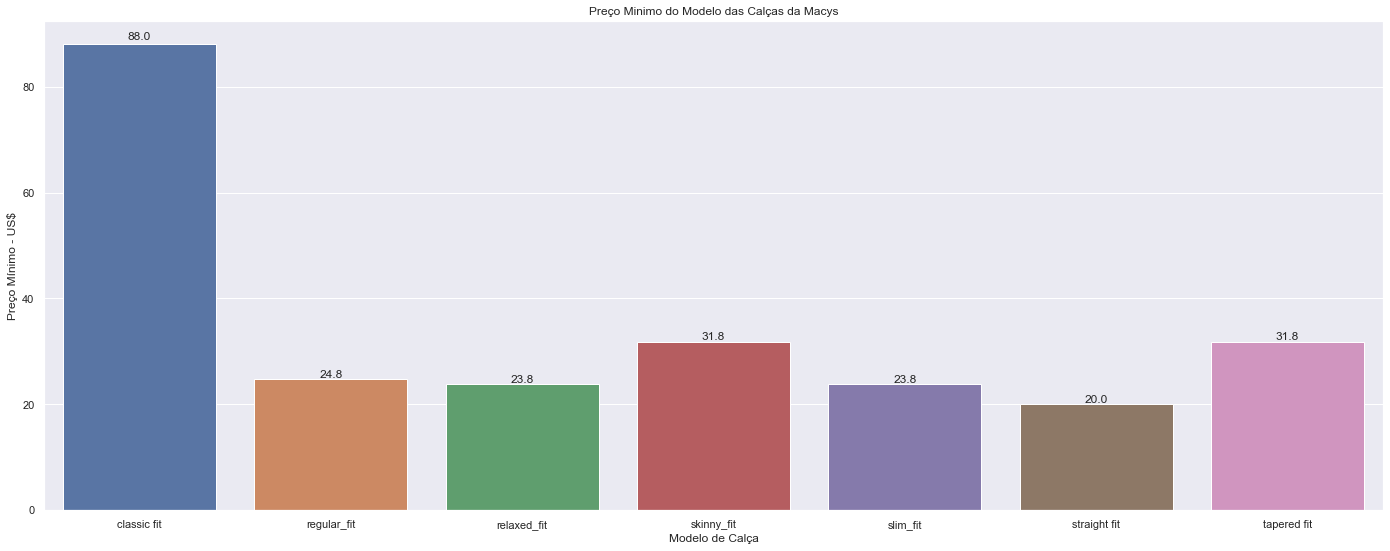

In [35]:
# Agrupar os preços e obter o preço mínimo.
df_preco_minimo = (df2[['fit', 'price']].groupby('fit')
                                               .min()
                                               .reset_index()
                                               .rename(columns = {'fit':'Modelo de Calça', 'price':'Preço Minimo'}))

# Ajuste da coluna de preço
df_preco_minimo['Preço Minimo'] = np.round(df_preco_minimo['Preço Minimo'], 2)

# Plotagem do Gráfico
grafico_preco_minimo_hm = sns.barplot(x=df_preco_minimo['Modelo de Calça'], y=df_preco_minimo['Preço Minimo'], data=df_preco_minimo);

# Título do Gráfico
plt.title('Preço Minimo do Modelo das Calças da Macys');
plt.ylabel('Preço Mínimo - US$')
show_values(grafico_preco_minimo_hm)

## 2.4 - Ditribuição dos Preços da Calças da Macys

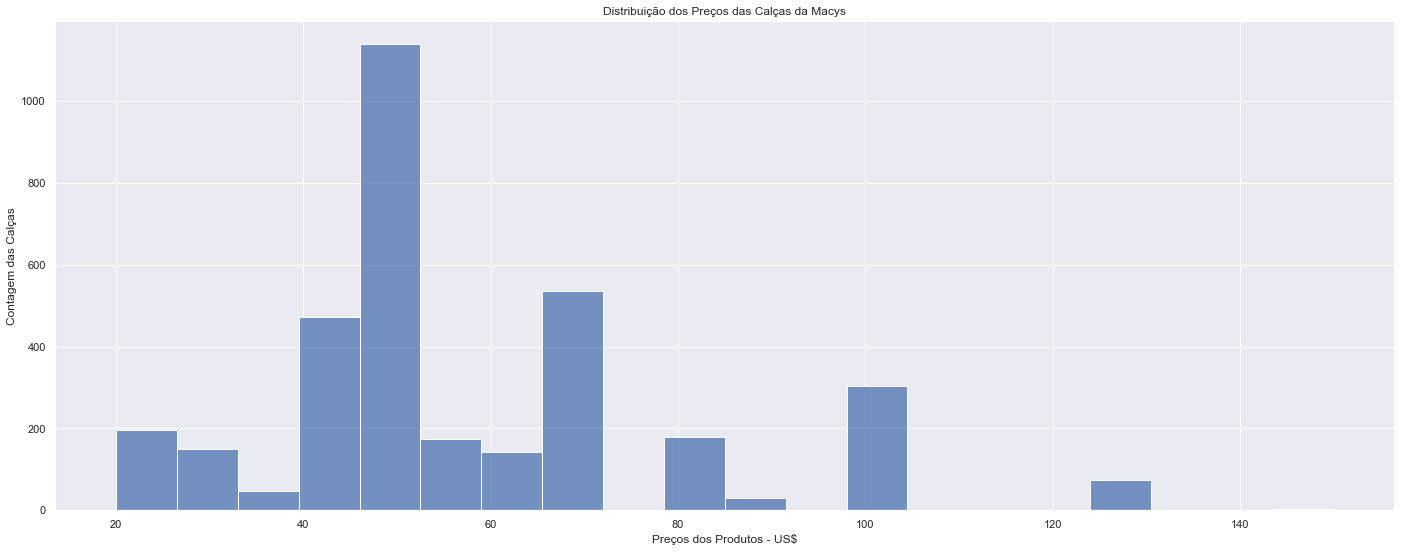

In [34]:
# Seleção dos Dados
df_historgrama = df2[['fit', 'price']].copy()

# Plotagem do Gráfico
histograma = sns.histplot(df_historgrama['price'], bins=20);

# Nomeação dos eixos
plt.ylabel('Contagem das Calças');
plt.xlabel('Preços dos Produtos - US$');
plt.title("Distribuição dos Preços das Calças da Macys");